<a href="https://colab.research.google.com/github/Tushar-2935/Blinkit-Data-Analysis/blob/main/Blinkit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Loading the dataset
data = pd.read_csv("/content/blinkit_data.csv")
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [ ]:
data.shape

(8523, 12)

In [ ]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [ ]:
data.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [ ]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [ ]:
data['Item Fat Content'] = data["Item Fat Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [ ]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [ ]:
#check for null values
data.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [ ]:
#Replacing the missing data in Item Weight with the mean
mean_weight = data["Item Weight"].mean()
data["Item Weight"].fillna(mean_weight,inplace=True)

<ipython-input-16-c4c2f4101bb0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Item Weight"].fillna(mean_weight,inplace=True)


In [ ]:
#Total Sales
total_sales = data["Sales"].sum()
print(f"Total Sales: {total_sales}")

#Average sales
average_sales = data["Sales"].mean()
print(f"Average Sales: {average_sales}")

#No of items sold
number_of_items_sold = data['Sales'].count()
print(f"Number of items sold: {number_of_items_sold}")

#Average Ratings
average_ratings = data["Rating"].mean()
print(f"Average Ratings: {average_ratings}")

Total Sales: 1201681.4808
Average Sales: 140.9927819781767
Number of items sold: 8523
Average Ratings: 3.965857092573038


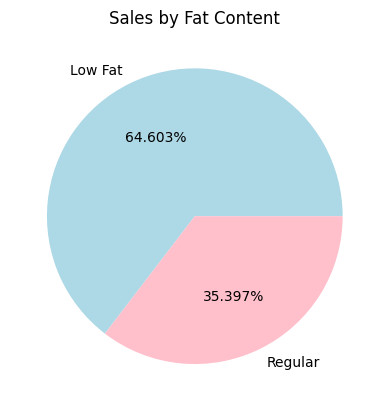

In [ ]:
#Data visualization
sales_by_fat = data.groupby("Item Fat Content")["Sales"].sum()
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct="%1.3f%%",colors = ["lightblue","pink"])
plt.title("Sales by Fat Content")
plt.show()

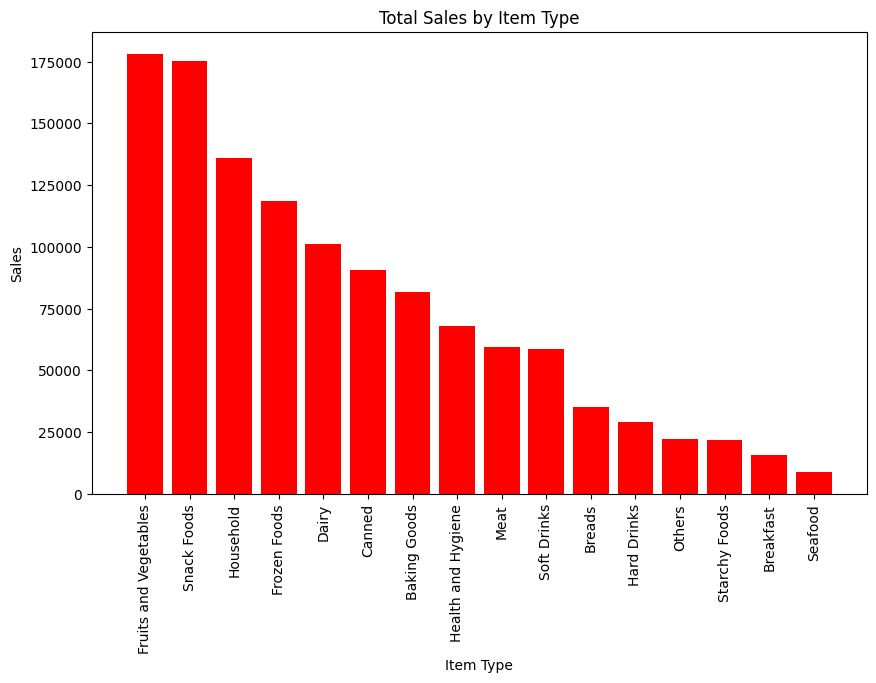

In [ ]:
#Total Sales by Item Type
sales_by_item_type = data.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize = (10,6))
plt.bar(sales_by_item_type.index,sales_by_item_type.values,color = ["red"])
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.title("Total Sales by Item Type")
plt.show()

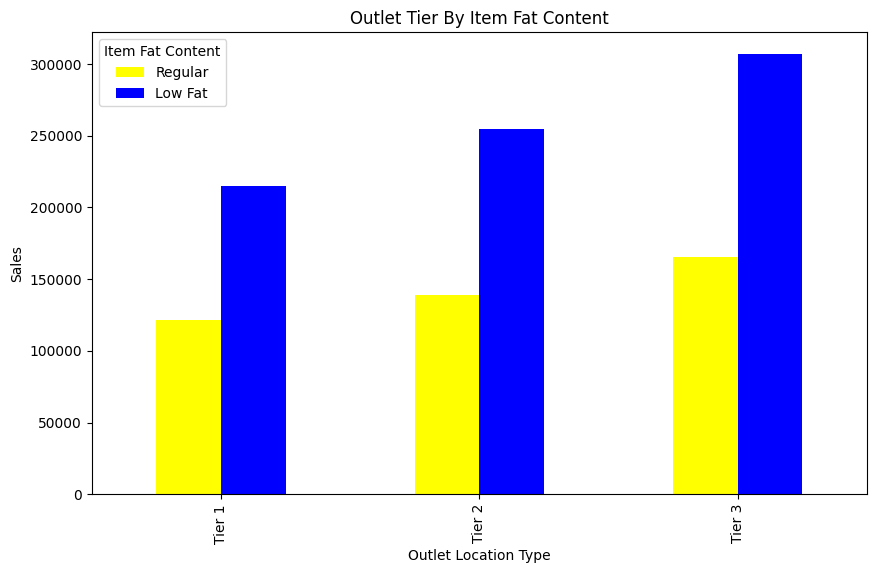

In [ ]:
group = data.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
group = group[["Regular","Low Fat"]]
group.plot(kind = "bar",figsize = (10,6),color = ["yellow","blue"])
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.title("Outlet Tier By Item Fat Content")
plt.show()

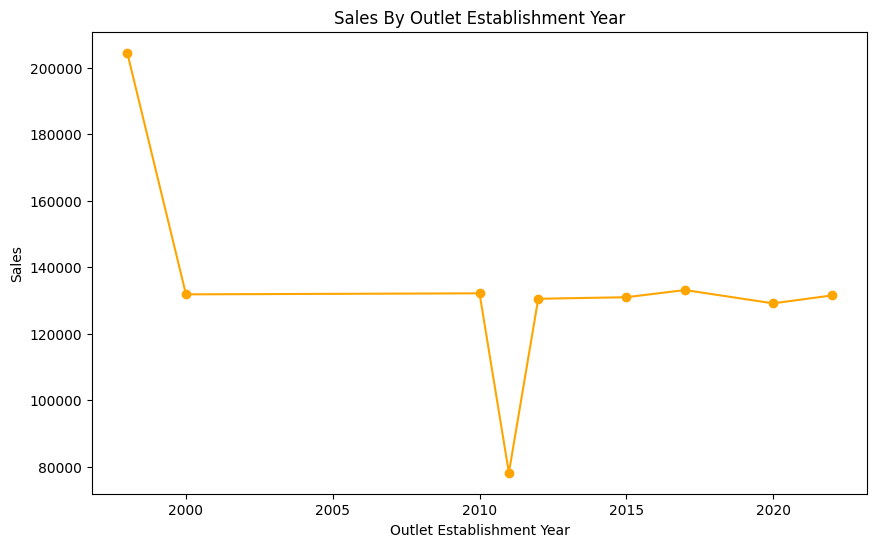

In [ ]:
#Sales by outlet establishment year
sales_by_year = data.groupby("Outlet Establishment Year")["Sales"].sum()
plt.figure(figsize = (10,6))
plt.plot(sales_by_year.index,sales_by_year.values,marker = "o",color = "orange")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Sales")
plt.title("Sales By Outlet Establishment Year")
plt.show()

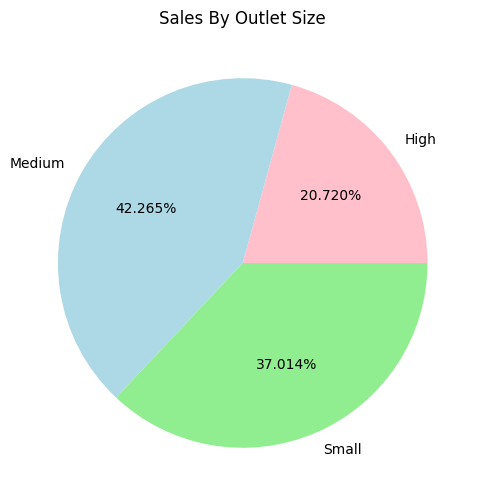

In [ ]:
#Sales by outlet size
sales_by_outlet_size = data.groupby("Outlet Size")["Sales"].sum()
plt.figure(figsize = (10,6))
plt.pie(sales_by_outlet_size,labels = sales_by_outlet_size.index,autopct = "%1.3f%%",colors = ["pink","lightblue","lightgreen"])
plt.title("Sales By Outlet Size")
plt.show()

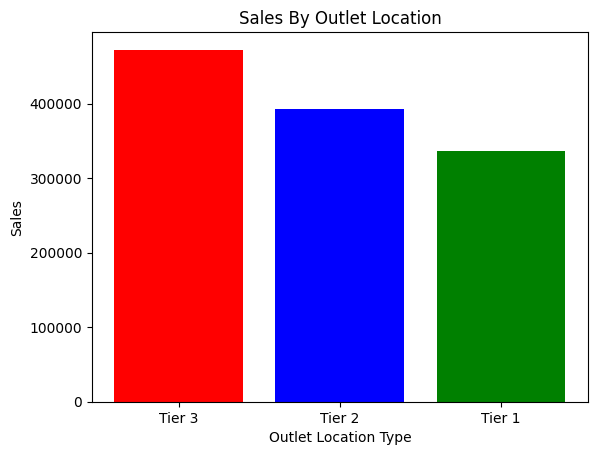

In [ ]:
#Sales by Outlet Location
sales_by_outlet_location = data.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False)
plt.bar(sales_by_outlet_location.index,sales_by_outlet_location.values,color = ["red","blue","green"])
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.title("Sales By Outlet Location")
plt.show()